PROYECTO
Primero exploré las variables, eliminé duplicados, verifiqué que no hubiera nulos y detecté outliers especialmente en BMI y charges.
Después convertí las variables categóricas a numéricas mediante One Hot Encoding para poder usarlas en el modelo.

1 Carga del dataset y exploración inicial

Comenzamos cargando el dataset de costes de seguro médico y exploramos su estructura general para entender cuántos registros contiene, qué tipo de variables incluye y detectar posibles problemas iniciales (texto, formatos, etc.).

In [48]:
import pandas as pd

df = pd.read_csv('../data/raw/medical_insurance_cost.csv')

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2 Descripción general del dataset.

Mostramos la información sobre tipos de datos, número de columnas, nulos y estadísticos descriptivos.
Esto nos permite entender qué variables son numéricas, cuáles categóricas y cuál será nuestra variable objetivo.

In [49]:
df.info()
df.describe(include='all')
# "all" incluye ✔ numéricas ✔ booleanas ✔ categóricas ✔ texto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Variables del dataset y su interpretación

age → Edad del paciente. Variable numérica.

sex → Sexo del paciente (male/female). Categórica.

bmi → Índice de masa corporal. Numérica.

children → Número de hijos a cargo. Numérica.

smoker → Si la persona fuma (yes/no). Categórica.

region → Zona donde reside. Categórica.

charges → Coste del seguro médico. Esta es nuestra variable objetivo.

3 Duplicados

Comprobamos si existen registros duplicados para evitar que influyan en el modelo.

In [50]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


4 Valores faltantes

Revisamos valores nulos para decidir si imputarlos o eliminarlos.
En este dataset normalmente no aparecen valores faltantes, pero lo verificamos.

In [51]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

5 Detección de outliers

Analizamos outliers especialmente en bmi y charges, ya que son variables numéricas que pueden tener valores extremos.

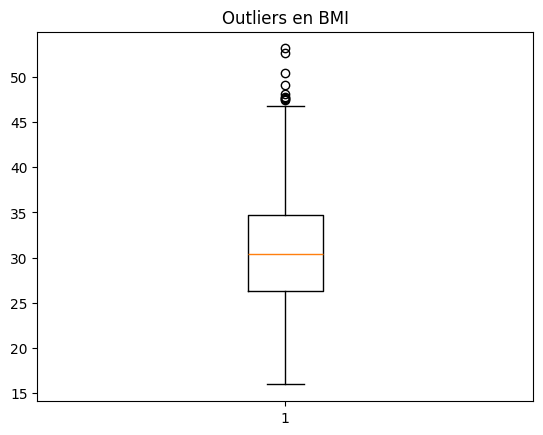

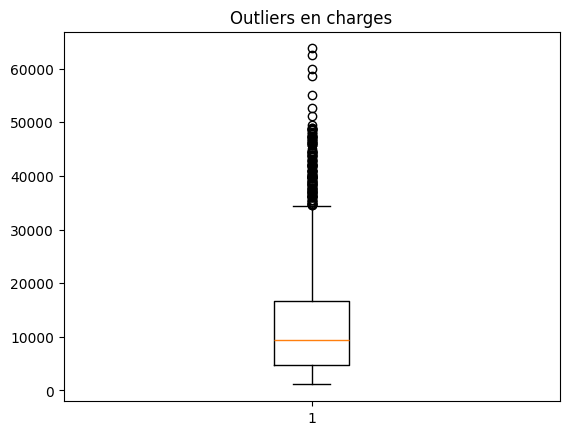

In [52]:
import matplotlib.pyplot as plt

plt.boxplot(df['bmi'])
plt.title("Outliers en BMI")
plt.show()

plt.boxplot(df['charges'])
plt.title("Outliers en charges")
plt.show()


6 Codificación de variables categóricas

Las columnas categóricas (sex, smoker, region) deben convertirse a valores numéricos mediante One Hot Encoding para que puedan usarse en el modelo de regresión lineal.

In [53]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


7 Escalado de variables numéricas

La regresión lineal funciona mejor cuando todas las variables están en escalas similares.
Aplicamos StandardScaler a las variables numéricas.

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['age', 'bmi', 'children']
df[num_cols] = scaler.fit_transform(df[num_cols])


8.Preparación final del dataset

Dividimos en variables predictoras (X) y la variable objetivo (y: charges).

In [55]:
X = df.drop('charges', axis=1)
y = df['charges']


9.División train/test

Separación en entrenamiento y prueba para evaluar el modelo.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


10. Modelo de Regresión Lineal

Entrenamos el modelo usando el conjunto de entrenamiento.

In [57]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


11. Evaluación del modelo

Medimos el rendimiento con:

MAE (error absoluto medio)

RMSE (raíz del error cuadrático medio)

R² (capacidad explicativa del modelo)

SOBRE MODELO:
Entrené un modelo de regresión lineal, dividí el dataset en entrenamiento y prueba y evalué el rendimiento usando MAE, RMSE y R².”

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 4177.045561036325
RMSE: 5956.342894363591
R²: 0.806928708119801


SOBRE RESULTADOS
El modelo muestra que las variables que más influyen en el precio del seguro son fumar, el BMI y la edad.
Fumar es el factor más determinante con diferencia: los fumadores pagan muchísimo más

12. Visualización: Coste real vs predicho

Esto permite evaluar si el modelo predice correctamente los costes del seguro.

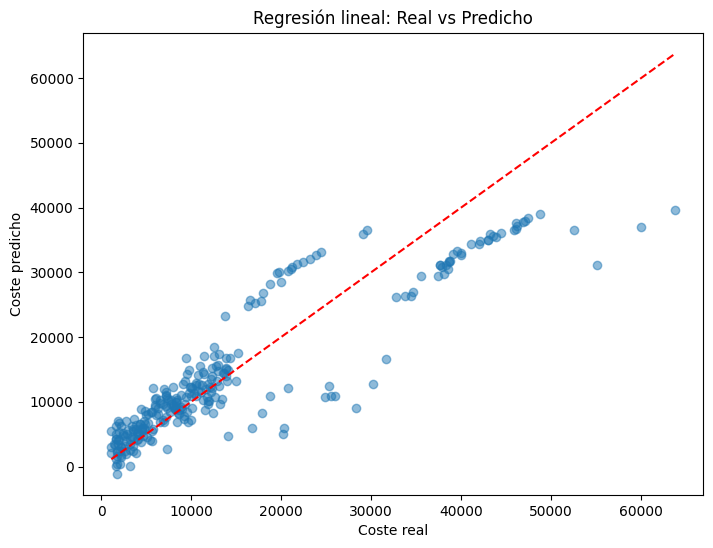

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Coste real")
plt.ylabel("Coste predicho")
plt.title("Regresión lineal: Real vs Predicho")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


CONCLUSION FINAL
El modelo de regresión lineal predice el coste del seguro médico (charges) a partir de variables personales como edad, BMI, número de hijos, si la persona fuma, el sexo y la región.
Los resultados muestran que algunas variables tienen un impacto muy fuerte en el precio, mientras que otras aportan muy poco.

1. Fumar es la variable que más influye en el coste del seguro.
Las personas fumadoras tienen un coste muy superior.
Es la variable más importante del modelo.

2. El BMI (índice de masa corporal) también eleva el coste.
Valores elevados de BMI → mayor riesgo de enfermedades → seguros más caros.

3. La edad es un predictor fuerte del coste.
A mayor edad, mayor probabilidad de necesitar atención médica → el seguro sube.

4. El número de hijos (children) influye, pero menos.
Los costes suben un poco a medida que aumenta la carga familiar, pero su efecto es más moderado.

5. El sexo y la región tienen un efecto pequeño.
No parecen ser determinantes para que el coste varíe demasiado; apenas aportan varianza al modelo.

6. El modelo lineal funciona bien, pero no captura todas las relaciones complejas.
La relación entre BMI, edad y consumo de tabaco no es perfecta para la linealidad, pero el modelo explica una parte importante del precio.